In [0]:
import matplotlib.pyplot as pltfrom
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000,test_split=0.2)
print(x_train[:40])
print(y_train[:2])

[[  0   0   0 ...  15  17  12]
 [  0   0   0 ... 505  17  12]
 [ 19 758  15 ...  11  17  12]
 ...
 [  2   2   7 ...   8  17  12]
 [  0   0   0 ... 134  17  12]
 [  0   0   0 ... 272  17  12]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)


In [0]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [0]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
print(x_train[:40])
print(y_train[:40])

[[  0   0   0 ...  15  17  12]
 [  0   0   0 ... 505  17  12]
 [ 19 758  15 ...  11  17  12]
 ...
 [  2   2   7 ...   8  17  12]
 [  0   0   0 ... 134  17  12]
 [  0   0   0 ... 272  17  12]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))



Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.8718 - acc: 0.5131 - val_loss: 1.7947 - val_acc: 0.5405
Epoch 2/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.7614 - acc: 0.5363 - val_loss: 1.7442 - val_acc: 0.5427
Epoch 3/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.6576 - acc: 0.5709 - val_loss: 1.6389 - val_acc: 0.5877
Epoch 4/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.5808 - acc: 0.5990 - val_loss: 1.7088 - val_acc: 0.5619
Epoch 5/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.4873 - acc: 0.6204 - val_loss: 1.5186 - val_acc: 0.6184
Epoch 6/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.4371 - acc: 0.6309 - val_loss: 1.5276 - val_acc: 0.6175
Epoch 7/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.3831 - acc: 0.6470 - val_loss: 1.4455 - val_acc: 0.6362
Epoch 8

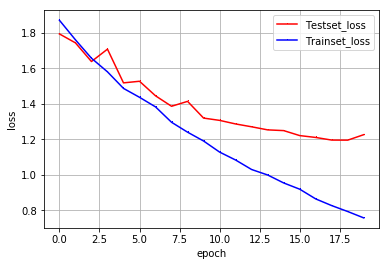

In [0]:
y_test_loss = history.history['val_loss']
y_train_loss = history.history['loss']

x_len = numpy.arange(len(y_test_loss))
plt.plot (x_len, y_test_loss, marker=',', c='red', label='Testset_loss')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

